In [2]:
!pip install numpy

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [14]:
train=pd.read_csv('train.csv')

In [15]:
import seaborn as sns

In [16]:
test=pd.read_csv('train.csv')

In [17]:
print(train.shape)
print(test.shape)

(891, 12)
(891, 12)


In [18]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [24]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [25]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
train['Embarked'].fillna('S',inplace=True)

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
test['Embarked'].fillna('S',inplace=True)

In [31]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [32]:
(177/891)*100

19.865319865319865

In [36]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [37]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),177)

In [41]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\Raj\AppData\Local\Temp\ipykernel_14224\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [44]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\Raj\AppData\Local\Temp\ipykernel_14224\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [45]:
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
#EDA

In [50]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [51]:
train.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   80     80     80      80    80   
       1                 136   136  136  136    136    136     136   136   
2      0                  97    97   97   97     97     97      97    97   
       1                  87    87   87   87     87     87      87    87   
3      0                 372   372  372  372    372    372     372   372   
       1                 119   119  119  119    119    119     119   119   

                 Embarked  
Pclass Survived            
1      0               80  
       1              136  
2      0               97  
       1               87  
3      0              372  
       1              119

In [53]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [54]:
119/(372+119)

0.24236252545824846

In [55]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [56]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [57]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

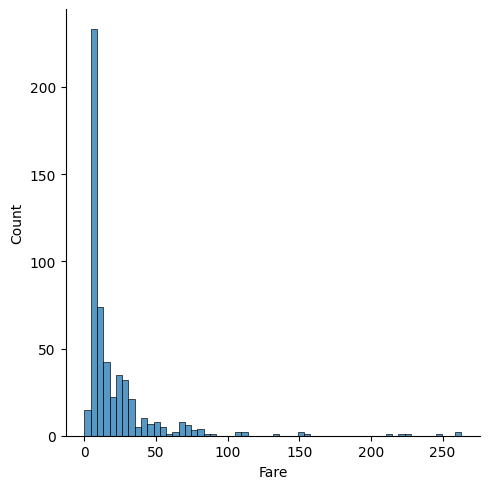

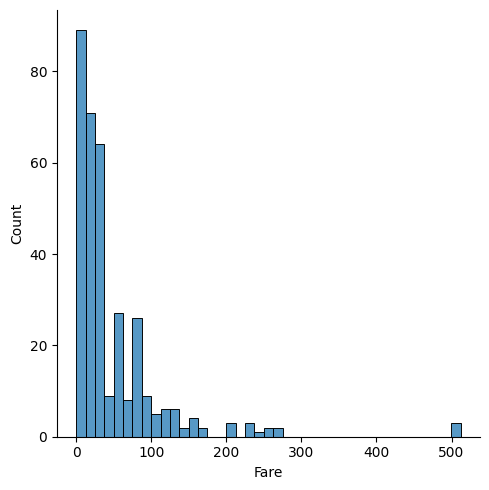

In [61]:
sns.displot(train['Fare'][train['Survived']==0])
sns.displot(train['Fare'][train['Survived']==1])

In [62]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [63]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [64]:
train['Family']=train['SibSp']+train['Parch']+1

In [68]:
test['Family']=test['SibSp']+test['Parch']+1

In [66]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [67]:
def cal(num):
    if num==1:
        return "Alone"
    elif num>1 and num<5:
        return "Medium"
    else:
        return "Large"
    

In [69]:
train['Family_size']=train['Family'].apply(cal)

In [71]:
test['Family_size']=test['Family'].apply(cal)

In [72]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [73]:
print(train.shape)
print(test.shape)

(891, 9)
(891, 9)


In [74]:
passengerId=test['PassengerId'].values

In [75]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [76]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [80]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [83]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [82]:
train.shape

(891, 10)

In [84]:
test.shape

(891, 10)

In [85]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [90]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [92]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred=classifier.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7374301675977654

In [102]:
xf=test.iloc[:,:].values

In [103]:
#Split the variables
x = test.iloc[:, :11].values
y = test.iloc[:, -1].values
x = train.iloc[:, :11].values
y = train.iloc[:, -1].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)


100.0


In [104]:
y_final=classifier.predict(xf)

In [105]:
y_final.shape

(891,)

In [106]:
passengerId.shape

(891,)

In [107]:
final=pd.DataFrame()

In [108]:
final

""


In [113]:
final['passengerId']=passengerId
final['survived']=y_final

In [114]:
final

,passengerId,survived
0,1,True
1,2,True
2,3,False
3,4,True
4,5,False
...,...,...
886,887,False
887,888,False
888,889,True
889,890,False


In [115]:
final.to_csv('submission.csv',index=False)